In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import os
import subprocess
import sys
import shutil

import codecs

In [2]:
from libraryIR import *   

### We look the MAP of all the runs in input and we order them

In [3]:
def sortedWeights(): 
    weights_dict={'n_BB2c1.0_0.res': 0.218448258139,
     'n_BM25b0.75_1.res': 0.208961047279,
     'n_DFR_BM25c1.0_2.res': 0.211827556059,
     'n_DLH_3.res': 0.204721421461,
     'n_DPH_4.res': 0.197285743236,
     'n_In_expB2c1.0_5.res': 0.223545296586,
     'n_LGDc1.0_7.res': 0.19913679555,
     'n_LemurTF_IDF_6.res': 0.220987874891,
     'n_PL2c1.0_8.res': 0.193314809189,
     'n_TF_IDF_9.res': 0.205028812476}
    import operator
    sorted_w = sorted(weights_dict.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_w 


In [6]:
def produceResults(combList,randomOption=False):
    path = os.getcwd()   
    dir_in = "input"   
    dir_w = "weights"
    dir_w_ml="weights_ml"
    dir_w_log="weights_log"
    dir_norm = "norm"
    dir_comb = "comb"
    if(randomOption==False):
        sorted_w=sortedWeights()
    filename_list = listFiles(path, dir_norm)
    np.random.seed(seed=1156818)
    results={}
    algs={"comb_anz.txt":comb_anz,"comb_max.txt":comb_max,"comb_median.txt":comb_median,"comb_min.txt":comb_min,
          "comb_mnz.txt":comb_mnz,"comb_sum.txt":comb_sum,
         "condorcet.txt":condorcet_alg,"condorcetWeighted.txt":condorcet_weighted ,
          "condorcetWeightedML.txt":condorcet_weightedML ,"condorcetWeightedLog.txt":condorcet_weightedLog}       

    for i in range(1,len(filename_list)+1,1):
        print i
        if(randomOption==False):
            repeat=1
        else:
            repeat=5
        results[i]={}
        for c in combList:
            results[i][c]=0

        for j in range(0,repeat,1):
            if(randomOption==False):
                perm=[ sorted_w[k][0] for k in range(0,i) ]
            else:
                perm=np.random.permutation(filename_list)[0:i]
            print "Ripetizione numero: "+str(j)
            #print perm
            for c in combList:
                print c
                algs[c](perm,path,dir_norm,dir_comb)
            for filename in combList:
                MAP=take_MAP(path,dir_comb,dir_w,filename,False)#calcolo il MAP
                results[i][filename]+=MAP
        #calculate average for each system   
        for filename in combList:
            results[i][filename]=results[i][filename]/repeat
    return results


In [5]:
def producePlot(results,combList,randomOption=False):
    #Prepare Data
    keys=results.keys()
    x=[]+keys
    x=x[1:len(x)]
    y={}
    for cl in combList:
        y[cl]=list()

    for i in range(2,len(keys)+1):
        for cl in combList:
            y[cl].append(results[i][cl])
            
    #Plotting 
    import matplotlib.pyplot as plt
    %matplotlib inline 
    #plt.rcParams["figure.figsize"]=[12,8]
    plt.figure(figsize=(12, 8), dpi=300)
    colors=["r","g", "b", "c", "k", "y"]
    
    if(randomOption==False):
        xtitle='Input retrieval systems sorted best to worst'
    else:
        xtitle='Number of randomly chosen input systems'
        
    plt.xlabel(xtitle)
    plt.ylabel('Mean Average Precision')
    if(randomOption==False):
        title=' combining the top i systems in order'
    else:
        title='combining random sets of systems'
    plt.title(title)
    for i in range(0,len(combList)):
        plt.plot(x,y[combList[i]],colors[i]+"--")
    plt.legend( [s.replace(".txt","") for s in combList])
    plt.show()     
    #plt.savefig("ImmaginePlot.png", dpi=300)

{1: {'condorcet.txt': 0.259574614424, 'condorcetWeightedML.txt': 0.259574614424, 'condorcetWeighted.txt': 0.259574614424, 'condorcetWeightedLog.txt': 0.259574614424}, 2: {'condorcet.txt': 0.247154004479, 'condorcetWeightedML.txt': 0.262045715905, 'condorcetWeighted.txt': 0.262045715905, 'condorcetWeightedLog.txt': 0.262045715905}, 3: {'condorcet.txt': 0.263035828833, 'condorcetWeightedML.txt': 0.262460508776, 'condorcetWeighted.txt': 0.263170985823, 'condorcetWeightedLog.txt': 0.263170985823}, 4: {'condorcet.txt': 0.260225061082, 'condorcetWeightedML.txt': 0.259083634637, 'condorcetWeighted.txt': 0.263508248445, 'condorcetWeightedLog.txt': 0.26036355208}, 5: {'condorcet.txt': 0.258306301841, 'condorcetWeightedML.txt': 0.259168692718, 'condorcetWeighted.txt': 0.258592291617, 'condorcetWeightedLog.txt': 0.258553692852}, 6: {'condorcet.txt': 0.250909576793, 'condorcetWeightedML.txt': 0.258542621357, 'condorcetWeighted.txt': 0.258893368191, 'condorcetWeightedLog.txt': 0.259572273069}, 7: {

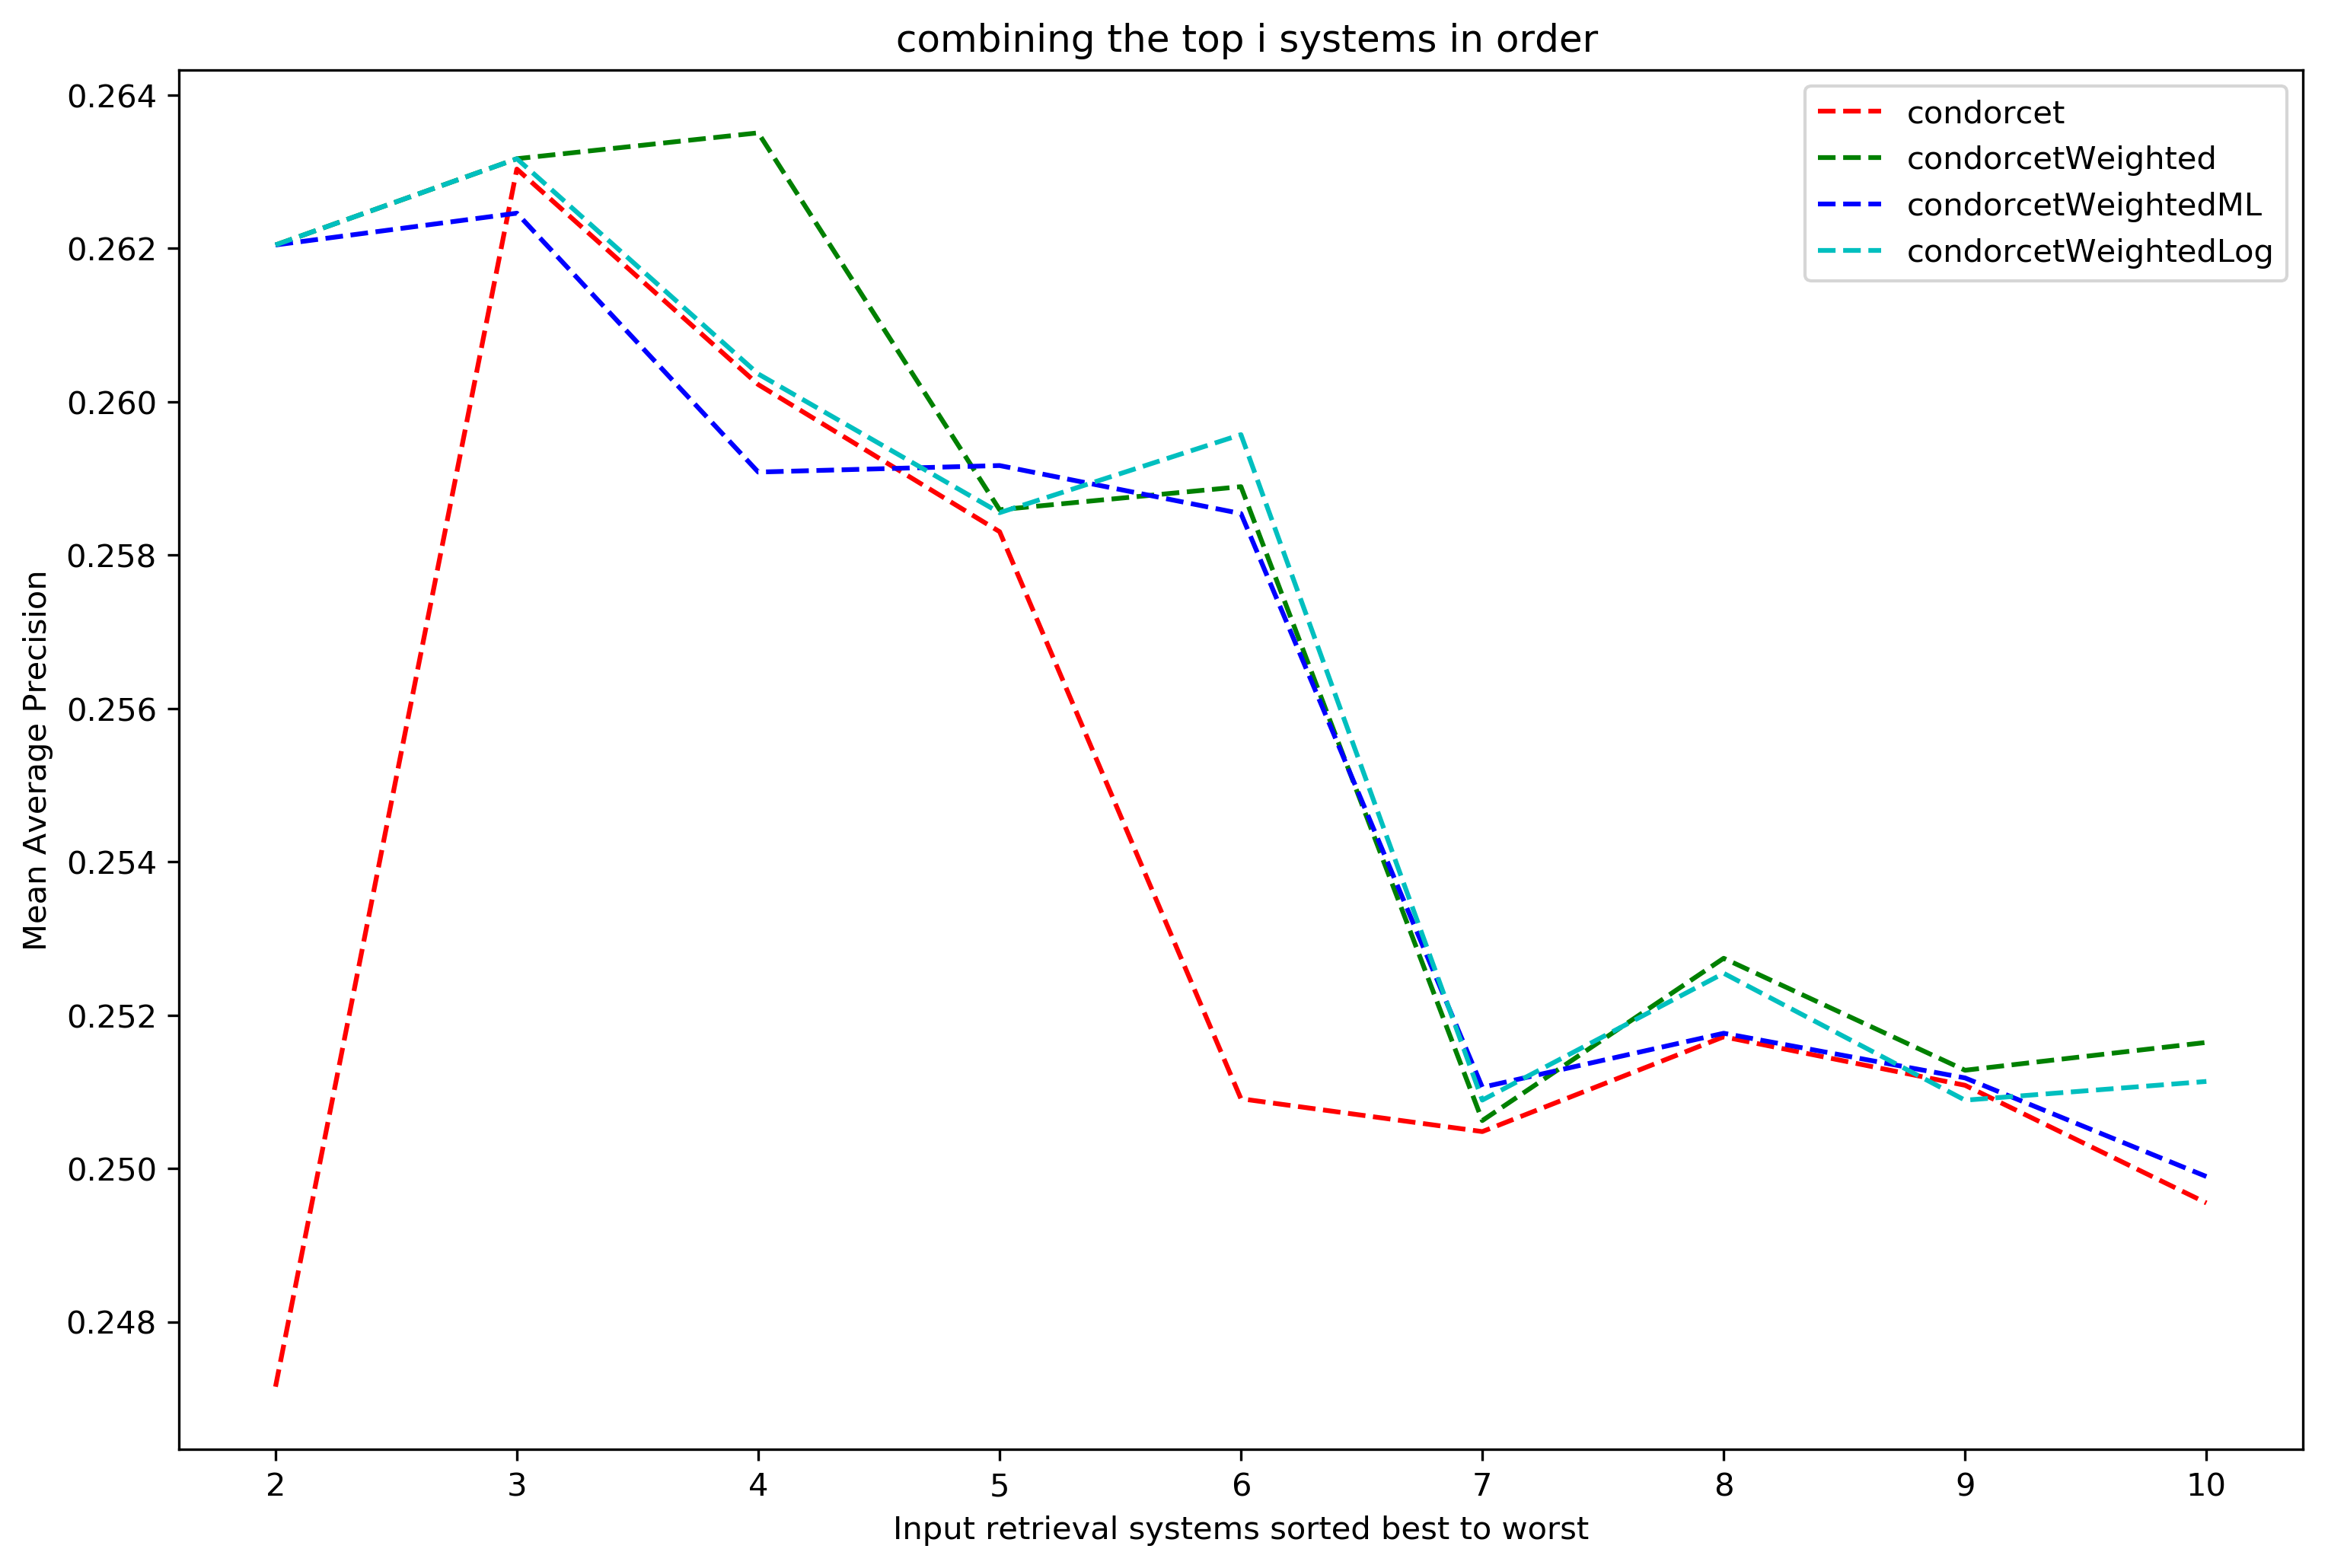

In [27]:
all_algs=['comb_min.txt', 'comb_anz.txt','comb_median.txt', 'comb_max.txt', 'comb_sum.txt', 'comb_mnz.txt', 'condorcet.txt', 'condorcetWeighted.txt',  'condorcetWeightedML.txt', 'condorcetWeightedLog.txt']
combs=['comb_min.txt', 'comb_anz.txt','comb_median.txt', 'comb_max.txt', 'comb_sum.txt', 'comb_mnz.txt']
combsCondor=['comb_mnz.txt', 'comb_median.txt','condorcet.txt', 'condorcetWeighted.txt' ]
condor=['condorcet.txt', 'condorcetWeighted.txt',  'condorcetWeightedML.txt', 'condorcetWeightedLog.txt']
rif=combs
results=produceResults(rif,randomOption=False)
print results
producePlot(results,rif,randomOption=False)